# Dataproject

**Table of contents**<a id='toc0_'></a>  
- [1. Objectives](#toc1_)
- [2. Import of packages](#toc2_)
- [3. Reading and cleaning data](#toc3_)
- [4. Merging datasets](#toc4_)
- [5. Analysis](#toc5_)
- [6. Concluding remarks](#toc6_)

## 1. <a id='toc1_'></a>[Objectives](#toc1_)

Focused on exploring the sporting habits of adults in Denmark, this project spans the years 2014-2022, aiming to identify trends in sports participation alongside attendance at sporting events. It's important to note that the primary aim of this endeavor is to showcase our coding proficiency rather than provide empirical insights.

Anticipated findings include a correlation between membership in sports organizations and attendance at corresponding sporting events. For instance, during the golden era of the Danish national women's handball team in the 1990s, there was a significant surge in memberships within handball organizations across Denmark. As interest in watching games grew, attendance likewise soared in tandem with the increase in memberships.

## 2. <a id='toc2_'></a>[Import of packages](#toc2_)

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will fetch data from DST (Statistikbanken). Being able to do so you need to have the following package downloaded. Simply remove the `#` if it is not downloaded on your computer

In [2]:
#%pip install git+https://github.com/alemartinello/dstapi
#%pip install pandas-datareader

Below we download the relevant packages that we will need when cleaning, interacting and plotting our data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import ipywidgets as widgets
import os 
from dstapi import DstApi
import seaborn as sns

## 3. <a id='toc3_'></a>[Reading and cleaning data](#toc3_)

We will import the data using two different techniques:
1. Downloading and storing data in our repository
2. Fetching directly from DST

Importing the first dataset we exploit technique 1. The data contains information on the number of adult members registered in four of the most popular sport organizations in Denmark. This includes football, handball, basketball and icehockey. 

### **Downloading data**

First of all, we make sure that the data is stored correctly

In [34]:
assert os.path.isdir('data/')
assert os.path.isfile('data/sport.csv')

print('Our repository contain the datasets: ')
os.listdir('data/')

Our repository contain the datasets: 


['sport.csv']

We read the relevant file

In [35]:
# Import data from our py.file
from dataproject import filename

# A short preview of the first 5 rows in the dataset
pd.read_csv(filename, encoding='latin1').head(5)

,";"" "";"" "";"" "";""2014"";""2015"";""2016"";""2017"";""2018"";""2019"";""2020"";""2021"";""2022"""
0,25-59 ï¿½r
1,";""Kï¿½n i alt"""
2,";"" "";""Hele landet"""
3,";"" "";"" "";""basketball"";3170;3120;3530;3440;401..."
4,";"" "";"" "";""football"";97240;98010;95900;96030;1..."


In [36]:
# We tell Python that ';' is meant to be a seperator
sport = pd.read_csv(filename, sep=';')
sport.head(5)

,,.1,.2,.3,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,25-59 �r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,K�n i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,,Hele landet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,,,basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
4,,,,football,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0


The data now looks better. Next we will delete the first 3 rows as they don't contain relevant data

In [37]:
# Drop first 3 rows
sport = sport.drop([0,1,2])
sport

,,.1,.2,.3,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,,,,basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
4,,,,football,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0
5,,,,handball,22830.0,22640.0,22320.0,22370.0,22960.0,22750.0,22640.0,21160.0,22780.0
6,,,,icehockey,1430.0,1500.0,1550.0,1760.0,1860.0,2170.0,2440.0,2500.0,2380.0


Now the first two columns are irrelevant. We remove them as well

In [38]:
# The columns that we want to drop
sport_drop = ['.1', '.2']

# We remove white spaces
sport.columns = sport.columns.str.strip()

# Drop the columns 
sport = sport.drop(columns=sport_drop)

# Preview
sport

,,.3,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,,basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
4,,football,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0
5,,handball,22830.0,22640.0,22320.0,22370.0,22960.0,22750.0,22640.0,21160.0,22780.0
6,,icehockey,1430.0,1500.0,1550.0,1760.0,1860.0,2170.0,2440.0,2500.0,2380.0


In [39]:
# Renaming the first column
sport.rename(columns = {'.3':'event'}, inplace=True)
sport

,,event,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,,basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
4,,football,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0
5,,handball,22830.0,22640.0,22320.0,22370.0,22960.0,22750.0,22640.0,21160.0,22780.0
6,,icehockey,1430.0,1500.0,1550.0,1760.0,1860.0,2170.0,2440.0,2500.0,2380.0


In [40]:
# Reset the index
sport.reset_index(inplace=True, drop=True)

# We make sure that the data is treated numerically
print(sport.dtypes)

          object
event     object
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
2021     float64
2022     float64
dtype: object


In [41]:
# A short descrition of the data
sport.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
mean,31167.500000,31317.500000,30825.000000,30900.000000,32642.500000,32717.500000,31565.000000,32555.000000,32832.50000
std,45104.575064,45487.620569,44381.427422,44414.220696,47030.478327,46971.771221,44473.393919,47272.279756,46734.23112
min,1430.000000,1500.000000,1550.000000,1760.000000,1860.000000,2170.000000,2440.000000,2500.000000,2380.00000
25%,2735.000000,2715.000000,3035.000000,3020.000000,3472.500000,3662.500000,3850.000000,3797.500000,4037.50000
50%,13000.000000,12880.000000,12925.000000,12905.000000,13485.000000,13455.000000,13480.000000,12695.000000,13685.00000
75%,41432.500000,41482.500000,40715.000000,40785.000000,42655.000000,42510.000000,41195.000000,41452.500000,42480.00000
max,97240.000000,98010.000000,95900.000000,96030.000000,101740.000000,101790.000000,96860.000000,102330.000000,101580.00000


We observe that the average number of memberships in the selected sports organizations has increased from 31,167 to 32,832 during the specified period. 

Having variables named as a numbers is problematic. Thus, we rename our year-variables. To do that, we use a dictonary.  

In [42]:
# We create the desired dictionary 
col_dict = {}
for i in range(2014,2022+1):
    col_dict[str(i)] = f'sport_{i}'
col_dict

{'2014': 'sport_2014',
 '2015': 'sport_2015',
 '2016': 'sport_2016',
 '2017': 'sport_2017',
 '2018': 'sport_2018',
 '2019': 'sport_2019',
 '2020': 'sport_2020',
 '2021': 'sport_2021',
 '2022': 'sport_2022'}

In [43]:
# Renaming our year-variables based on our dictionary
sport.rename(columns=col_dict,inplace=True)
sport

,,event,sport_2014,sport_2015,sport_2016,sport_2017,sport_2018,sport_2019,sport_2020,sport_2021,sport_2022
0,,basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
1,,football,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0
2,,handball,22830.0,22640.0,22320.0,22370.0,22960.0,22750.0,22640.0,21160.0,22780.0
3,,icehockey,1430.0,1500.0,1550.0,1760.0,1860.0,2170.0,2440.0,2500.0,2380.0


The data is better in a long format since we have two identifiers, event and year

In [45]:
# Arranging the data to a long dataset
sport_long = pd.wide_to_long(sport, stubnames='sport_', i='event', j='year')
sport_long.head(5)

,,,sport_
event,year,,
basketball,2014,,3170.0
football,2014,,97240.0
handball,2014,,22830.0
icehockey,2014,,1430.0
basketball,2015,,3120.0


We now take a look into the national sport of Denmark, football

In [47]:
sport_long.xs('football', level='event')

,,sport_
year,,
2014,,97240.0
2015,,98010.0
2016,,95900.0
2017,,96030.0
2018,,101740.0
2019,,101790.0
2020,,96860.0
2021,,102330.0
2022,,101580.0


We observe a steady increase in the number of members during the period.

In [48]:
# Remember to reset the index
sport_long = sport_long.reset_index()
sport_long.loc[sport_long.event == 'football', :]

,event,year,,sport_
1,football,2014,,97240.0
5,football,2015,,98010.0
9,football,2016,,95900.0
13,football,2017,,96030.0
17,football,2018,,101740.0
21,football,2019,,101790.0
25,football,2020,,96860.0
29,football,2021,,102330.0
33,football,2022,,101580.0


<Axes: xlabel='year'>

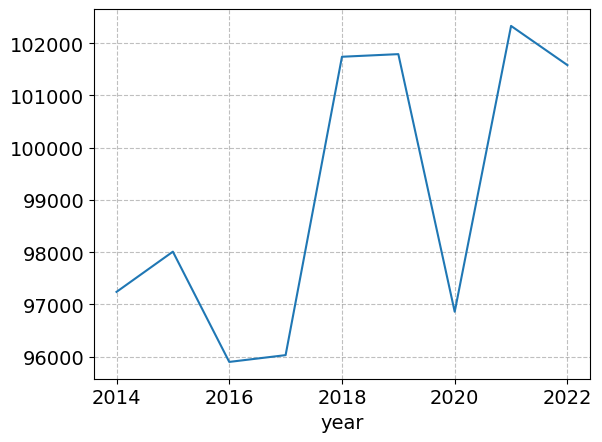

In [19]:
# Plotting the trend
sport_fodbold = sport_long.loc[sport_long['event'] == 'football', :]
sport_fodbold.plot(x='year',y='sport_',legend=False)

Visually, we can clearly see the upward trend. It's important to acknowledge that the year 2020 stands out significantly in our analysis due to the Covid-19 pandemic. During this time, restrictions in Denmark prohibited group exercise, leading to a decrease in sports memberships. Additionally, professional sporting events were conducted without spectators.

In [46]:
# Creating a dropdown menu, allowing to see the trend for each sport
import ipywidgets as widgets
def plot_e(df, sport):
    I = df['event'] == sport
    ax=df.loc[I,:].plot(x='year', y='sport_', style='-o', legend=False)

In [49]:
widgets.interact(plot_e,
    df = widgets.fixed(sport_long),
    sport = widgets.Dropdown(description='event',
                             options=sport_long.event.unique(),
                             value='football') 
);

interactive(children=(Dropdown(description='event', index=1, options=('basketball', 'football', 'handball', 'i…

### **Fetching data** 

We will utilize DstApi. The dataset includes data on attendance for the four most popular sports (ice hockey, football, handball, and basketball) during the period 2007-2023. Our focus will be on the national teams and top leagues, as these typically draw the largest crowds and represent the pinnacle of professionalism.

In [76]:
# Fetching the data and displaying
ind = DstApi('IDRTIL01')
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table IDRTIL01: Attendances at selected sportsevents by sport, attendances and matches and time
Last update: 2023-10-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,SPORTS,24,SPO005,Ice hockey - International (In Denmark) - men,SPO115,Handball - 1. Division - women,False
1,TILSKUER,3,ENH05,Attendances (numbers),ENH15,Average attendances per match,False
2,Tid,17,2006/2007,2006/2007,2022/2023,2022/2023,True


In [77]:
# Get an overview of relevant variables to be chosen
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

SPORTS:


,id,text
0,SPO005,Ice hockey - International (In Denmark) - men
1,SPO010,Ice hockey - The Ice Hockey League - men
2,SPO015,Ice hockey - The Ice Hockey League play-offs a...
3,SPO020,Ice hockey - The Ice Hockey League - Season to...
4,SPO025,Football - International (In Denmark) - men
5,SPO030,Football - International (In Denmark) - women
6,SPO035,Football - Superleague - men
7,SPO040,Football - 1. Division - men
8,SPO045,Football - 2. Division - men
9,SPO120,Football - 3. Division - men


TILSKUER:


,id,text
0,ENH05,Attendances (numbers)
1,ENH10,Matches (numbers)
2,ENH15,Average attendances per match


Tid:


,id,text
0,2006/2007,2006/2007
1,2007/2008,2007/2008
2,2008/2009,2008/2009
3,2009/2010,2009/2010
4,2010/2011,2010/2011
5,2011/2012,2011/2012
6,2012/2013,2012/2013
7,2013/2014,2013/2014
8,2014/2015,2014/2015
9,2015/2016,2015/2016


In [78]:
params = ind._define_base_params(language='en')
params

{'table': 'idrtil01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'SPORTS', 'values': ['*']},
  {'code': 'TILSKUER', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [79]:
# Fetching the appropiate data
params = {'table': 'idrtil01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'SPORTS', 'values': ['SPO005', 'SPO020', 'SPO025', 'SPO035', 'SPO050','SPO065','SPO070','SPO090']},
  {'code': 'TILSKUER', 'values': ['ENH15']},
  {'code': 'Tid', 'values': ['*']}]}
params

{'table': 'idrtil01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'SPORTS',
   'values': ['SPO005',
    'SPO020',
    'SPO025',
    'SPO035',
    'SPO050',
    'SPO065',
    'SPO070',
    'SPO090']},
  {'code': 'TILSKUER', 'values': ['ENH15']},
  {'code': 'Tid', 'values': ['*']}]}

In [80]:
# Fetching the appropiate data
sport_api = ind.get_data(params=params)
sport_api.head(5)

,SPORTS,TILSKUER,TID,INDHOLD
0,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2006/2007,..
1,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2007/2008,..
2,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2008/2009,1437
3,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2009/2010,1362
4,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2011/2012,1489


In [81]:
# We rename the variables and drop irrelevant one
sport_api.rename(columns={'INDHOLD':'avr_attend'}, inplace=True)
sport_api.rename(columns={'TID':'year'}, inplace=True)
sport_api.rename(columns={'SPORTS':'event'}, inplace=True)
sport_api.drop(columns=['TILSKUER'], inplace=True)
sport_api.sample(5)

,event,year,avr_attend
73,Basketball - International (In Denmark) - men,2019/2020,2800
59,Handball - International (In Denmark) - men,2015/2016,8350
125,Football - International (In Denmark) - men,2019/2020,23000
9,Ice hockey - The Ice Hockey League - Season to...,2016/2017,1449
70,Basketball - International (In Denmark) - men,2018/2019,2050


In [82]:
# Changing the names of the events
new_names = {
    'Ice hockey - The Ice Hockey League - Season total - men':'icehockey_league',
    'Ice hockey - International (In Denmark) - men':'icehockey_national',
    'Basketball - International (In Denmark) - men':'basketball_national',
    'Football - International (In Denmark) - men':'football_national',
    'Football - Superleague - men':'football_league',
    'Basketball -The Basketball League season total - men':'basketball_league',
    'Handball - International (In Denmark) - men':'handball_national',
    'Handball - The Handball League season total - men':'handball_league'
}

# Applying the new names
sport_api['event'] = sport_api['event'].replace(new_names)

sport_api.sample(5)

,event,year,avr_attend
67,basketball_national,2010/2011,0
76,basketball_national,2022/2023,925
10,icehockey_league,2017/2018,1421
54,handball_league,2013/2014,1790
71,handball_national,2018/2019,10653


We encounter a challenge in our dataset: in Denmark, sports seasons begin and end in the summer rather than aligning with the calendar year. To simplify our analysis, we will adopt the following approach:

We will consider the 2006/2007 season as 2007, the 2007/2008 season as 2008, and so forth, with the 2022/2023 season counted as 2023. While this arrangement is not perfect, it is necessary for our analysis.

In [83]:
# We establish a loop to convert seasonal accounting into annual 
new_year_loop = {}
for year in range(2006,2023+1):
    year_str = str(year)
    next_year_str = str(year+1)
    new_year_loop[f'{year_str}/{next_year_str}'] = year_str

# Check
sport_api['year'] = sport_api['year'].replace(new_year_loop)

# We create a numerical version of 'avr_attend'
sport_api['avr_attend_numeric'] = pd.to_numeric(sport_api['avr_attend'], errors='coerce')
sport_api.sample(5)

,event,year,avr_attend,avr_attend_numeric
52,basketball_national,2013,1033,1033.0
133,icehockey_national,2021,1500,1500.0
5,icehockey_league,2012,1695,1695.0
27,football_league,2017,5881,5881.0
76,basketball_national,2022,925,925.0


In [84]:
# Making the column "avr_attend" numerical
sport_api['avr_attend_numeric'] = pd.to_numeric(sport_api['avr_attend'], errors='coerce')
non_numeric_values = sport_api[pd.isnull(sport_api['avr_attend_numeric'])]

In [85]:
# Set up an interactive plot
def plot_f(df, sport):
    I = df['event'] == sport
    ax=df.loc[I,:].plot(x='year', y='avr_attend_numeric', style='-o', legend=False)

In [86]:
widgets.interact(plot_f,
    df = widgets.fixed(sport_api),
    sport = widgets.Dropdown(description='event',
                             options=sport_api.event.unique(),
                             value='football_national') 
);

interactive(children=(Dropdown(description='event', index=6, options=('icehockey_league', 'football_league', '…

As expected, the year 2020 is an outlier for every event

## 4. <a id='toc4_'></a>[Merging datasets](#toc4_)

We aim to prepare our dataset for merging. To achieve this, we consolidate the attendance dataset by creating a single overarching variable for each sport. 
$$
sport_{i} = sport_{i}national + sport_{i}league,
$$
where $i={basketball,football,handball,icehockey}$. Now each sport variable measures the overall attendance in a given year for both national team and league teams. 

In [87]:
sport_api = sport_api.drop(columns=['avr_attend'])

In [88]:
# We group the data by 'year' and 'event'
grouped_data = sport_api.groupby(['year', 'event'])['avr_attend_numeric'].sum().reset_index()

# Select and filter only the 'national' and 'league' observations for each sport, then create a new variable for each
sports = ['icehockey', 'football', 'basketball', 'handball']
for sport in sports:
    filtered_data = grouped_data[grouped_data['event'].str.contains(sport)]
    overall_attend = filtered_data.groupby('year')['avr_attend_numeric'].sum().reset_index()
    overall_attend.rename(columns={'avr_attend_numeric': f'{sport}_overall_attend'}, inplace=True)
    sport_api = sport_api.merge(overall_attend, on='year', how='left')

In [89]:
# We construct the overall sport variable
sport_api['event'] = sport_api['event'].replace({
    'icehockey_national': 'icehockey',
    'icehockey_league': 'icehockey',
    'football_national': 'football',
    'football_league': 'football',
    'handball_national': 'handball',
    'handball_league': 'handball',
    'basketball_national': 'basketball',
    'basketball_league': 'basketball'
})

# Drop duplicates
sport_api = sport_api.drop(columns=['avr_attend_numeric'])
sport_api = sport_api.drop_duplicates()

In [90]:
# Makes year the same type (string)
sport_long['year'] = sport_long['year'].astype(str)

# We merge based on 'year' and 'event'
merged = pd.merge(sport_long, sport_api, on=['year','event'], how='inner')
merged

,event,year,,sport_,icehockey_overall_attend,football_overall_attend,basketball_overall_attend,handball_overall_attend
0,basketball,2014,,3170.0,2983.0,26999.0,1579.0,6324.0
1,football,2014,,97240.0,2983.0,26999.0,1579.0,6324.0
2,handball,2014,,22830.0,2983.0,26999.0,1579.0,6324.0
3,icehockey,2014,,1430.0,2983.0,26999.0,1579.0,6324.0
4,basketball,2015,,3120.0,3023.0,32004.0,867.0,10240.0
5,football,2015,,98010.0,3023.0,32004.0,867.0,10240.0
6,handball,2015,,22640.0,3023.0,32004.0,867.0,10240.0
7,icehockey,2015,,1500.0,3023.0,32004.0,867.0,10240.0
8,basketball,2016,,3530.0,2824.0,22962.0,2031.0,6235.0
9,football,2016,,95900.0,2824.0,22962.0,2031.0,6235.0


In [91]:
# A preview of what it would look for 'football'
merged[merged['event'] == 'football']

,event,year,,sport_,icehockey_overall_attend,football_overall_attend,basketball_overall_attend,handball_overall_attend
1,football,2014,,97240.0,2983.0,26999.0,1579.0,6324.0
5,football,2015,,98010.0,3023.0,32004.0,867.0,10240.0
9,football,2016,,95900.0,2824.0,22962.0,2031.0,6235.0
13,football,2017,,96030.0,7735.0,30181.0,3163.0,7358.0
17,football,2018,,101740.0,3501.0,23779.0,2678.0,12518.0
21,football,2019,,101790.0,1575.0,27745.0,3303.0,6523.0
25,football,2020,,96860.0,161.0,8073.0,99.0,525.0
29,football,2021,,102330.0,2925.0,43950.0,1862.0,9542.0
33,football,2022,,101580.0,3568.0,46156.0,1454.0,10117.0


We identify that the majority of the columns are irrelevant. We will now make four datasets that contain the relevant information for each sport

In [92]:
# We make four seperate datasets for each sport
sports = ['football', 'icehockey', 'basketball', 'handball']

for sport in sports:
    globals()[f"{sport}_data"] = merged[merged['event'] == sport]

handball_data = handball_data.drop(['icehockey_overall_attend', 'football_overall_attend', 'basketball_overall_attend'], axis=1)
football_data = football_data.drop(['icehockey_overall_attend', 'handball_overall_attend', 'basketball_overall_attend'], axis=1)
basketball_data = basketball_data.drop(['icehockey_overall_attend', 'football_overall_attend', 'handball_overall_attend'], axis=1)
icehockey_data = icehockey_data.drop(['handball_overall_attend', 'football_overall_attend', 'basketball_overall_attend'], axis=1)

Below we present a preview of each new dataset

In [93]:
handball_data

,event,year,,sport_,handball_overall_attend
2,handball,2014,,22830.0,6324.0
6,handball,2015,,22640.0,10240.0
10,handball,2016,,22320.0,6235.0
14,handball,2017,,22370.0,7358.0
18,handball,2018,,22960.0,12518.0
22,handball,2019,,22750.0,6523.0
26,handball,2020,,22640.0,525.0
30,handball,2021,,21160.0,9542.0
34,handball,2022,,22780.0,10117.0


In [56]:
football_data

,event,year,,sport_,football_overall_attend
1,football,2014,,97240.0,26999.0
5,football,2015,,98010.0,32004.0
9,football,2016,,95900.0,22962.0
13,football,2017,,96030.0,30181.0
17,football,2018,,101740.0,23779.0
21,football,2019,,101790.0,27745.0
25,football,2020,,96860.0,8073.0
29,football,2021,,102330.0,43950.0
33,football,2022,,101580.0,46156.0


In [57]:
basketball_data

,event,year,,sport_,basketball_overall_attend
0,basketball,2014,,3170.0,1579.0
4,basketball,2015,,3120.0,867.0
8,basketball,2016,,3530.0,2031.0
12,basketball,2017,,3440.0,3163.0
16,basketball,2018,,4010.0,2678.0
20,basketball,2019,,4160.0,3303.0
24,basketball,2020,,4320.0,99.0
28,basketball,2021,,4230.0,1862.0
32,basketball,2022,,4590.0,1454.0


In [58]:
icehockey_data

,event,year,,sport_,icehockey_overall_attend
3,icehockey,2014,,1430.0,2983.0
7,icehockey,2015,,1500.0,3023.0
11,icehockey,2016,,1550.0,2824.0
15,icehockey,2017,,1760.0,7735.0
19,icehockey,2018,,1860.0,3501.0
23,icehockey,2019,,2170.0,1575.0
27,icehockey,2020,,2440.0,161.0
31,icehockey,2021,,2500.0,2925.0
35,icehockey,2022,,2380.0,3568.0


## 5. <a id='toc5_'></a>[Analysis](#toc5_)

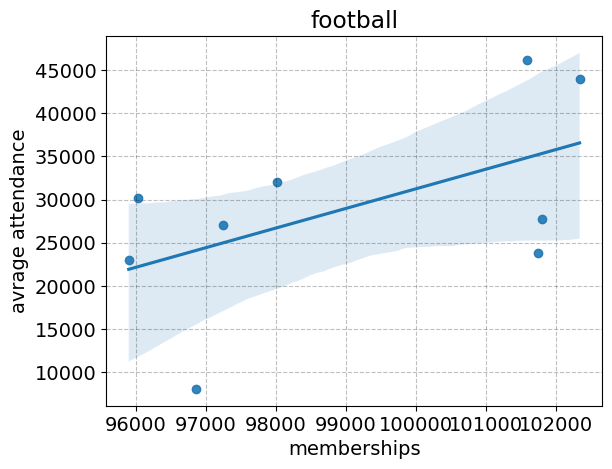

In [102]:
sns.regplot(x=football_data['sport_'], y=football_data['football_overall_attend'], data=football_data, scatter_kws={'alpha':0.9})

plt.xlabel('memberships')
plt.ylabel('avrage attendance')
plt.title('football')

plt.show()

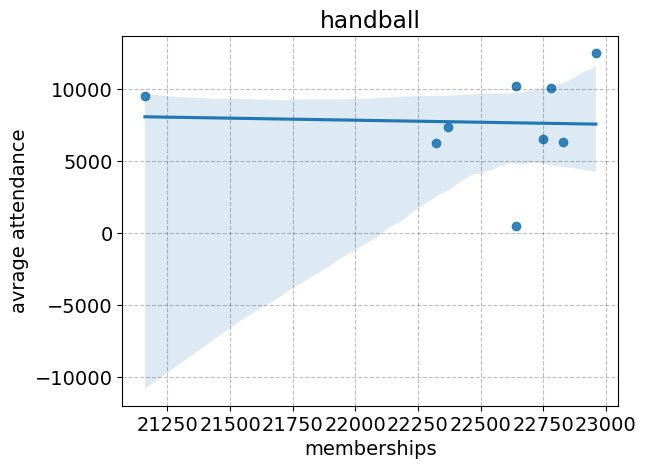

In [103]:
sns.regplot(x=handball_data['sport_'], y=handball_data['handball_overall_attend'], data=handball_data, scatter_kws={'alpha':0.9})

plt.xlabel('memberships')
plt.ylabel('avrage attendance')
plt.title('handball')

plt.show()

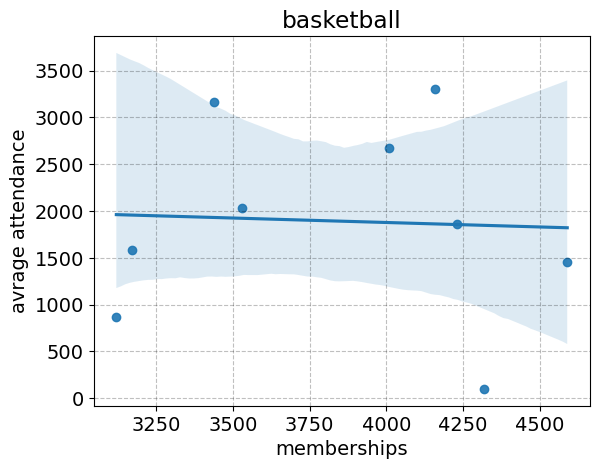

In [104]:
sns.regplot(x=basketball_data['sport_'], y=basketball_data['basketball_overall_attend'], data=basketball_data, scatter_kws={'alpha':0.9})

plt.xlabel('memberships')
plt.ylabel('avrage attendance')
plt.title('basketball')

plt.show()

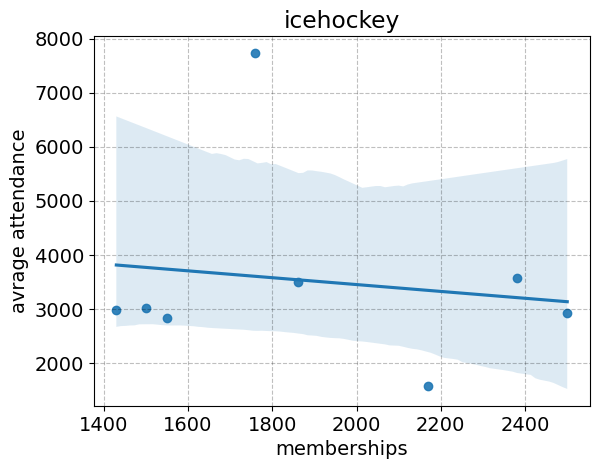

In [107]:
#icehockey_data = icehockey_data[icehockey_data['year'] != '2020']
sns.regplot(x=icehockey_data['sport_'], y=icehockey_data['icehockey_overall_attend'], data=icehockey_data, scatter_kws={'alpha':0.9})

plt.xlabel('memberships')
plt.ylabel('avrage attendance')
plt.title('icehockey')

plt.show()

## 6. <a id='toc6_'></a>[Concluding remarks](#toc6_)

First and foremost, we recognize that our analysis and approach are not the most efficient one. The data itself had its problems, one counted on annual basis, the other seasonally - moreover one counted the memberships of adults while the other counted attendance of all age groups. 

That being said, we see... 